## GReaT Example with Iris Dataset

In [1]:
# # Execute only once!
# import os
# import sys
# sys.path.append("..")
# os.chdir("..")

# os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("C:\\0\\Github\\cs848-group-project\\be_great\\examples\\Example_Iris.ipynb"), '..')))
os.environ["WANDB_DISABLED"] = "true"


In [3]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [4]:
from utils import set_logging_level


In [5]:
import matplotlib.pyplot as plt

In [6]:
logger = set_logging_level(logging.INFO)

### Load Data

In [7]:
data = datasets.load_iris(as_frame=True).frame
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.columns = ["sepal length", "sepal width", "petal length", "petal width", "target"]

### Create GReaT Model

In [9]:
from be_great.dp.dp import DPLLMTGen


# great = GReaT("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=1000,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=500,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_iris", # Name of the directory where all intermediate steps are saved
#               batch_size=16,                 # Batch Size
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=5e-5            # Set the inital learning rate
#              )
great = DPLLMTGen(
    "gpt2",
    # epochs=1000,
    # save_steps=2000,
    logging_steps=50,
    experiment_dir="trainer_iris_dpllmtgen_test",
    batch_size=4,                 # Batch Size
    # lr_scheduler_type="constant", # Specify the learning rate scheduler 
    stage1_epochs = 75,
    stage2_epochs = 200,
    stage1_lr =1e-4,
    stage2_lr=1e-5,
    loss_alpha=0.65,
    loss_beta=0.1,
    loss_lmbda=1.0,
    per_sample_max_grad_norm=1., 
    target_epsilon=10., 
    # efficient_finetuning="lora"
)

# from be_great.dp_basic import DPBasic
# great = DPBasic("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=1,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=100,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_iris_basic_dp_test", # Name of the directory where all intermediate steps are saved
#               batch_size=8,                 # Batch Size
#               per_sample_max_grad_norm=1.0,
#               target_epsilon=3.0,
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=4e-5            # Set the inital learning rate
#               #efficient_finetuning="lora",
#               save_safetensors=False
#              )

2024-11-30 03:06:41,890 - INFO - PyTorch version 2.5.1+cu121 available. (config.py:54)


### Start Training

In [10]:
trainer = great.fit(data)

2024-11-30 03:06:44,820 - INFO - Convert data into HuggingFace dataset object... (dp.py:100)
2024-11-30 03:06:44,842 - INFO - Create GReaT Trainer... (dp.py:105)
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\0\Github\cs848-group-project\be_great\be_great\dp\dp.py:113: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `GReaTTrainer.__init__`. Use `processing_class` instead.
  great_trainer = GReaTTrainer(
2024-11-30 03:06:48,831 - INFO - Start format learning... (dp.py:122)


  0%|          | 0/2850 [00:00<?, ?it/s]

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 0.9381, 'grad_norm': 14.258244514465332, 'learning_rate': 9.824561403508771e-05, 'epoch': 1.32}
{'loss': 0.6745, 'grad_norm': 7.386038780212402, 'learning_rate': 9.649122807017544e-05, 'epoch': 2.63}
{'loss': 0.6598, 'grad_norm': 8.834197998046875, 'learning_rate': 9.473684210526316e-05, 'epoch': 3.95}
{'loss': 0.6246, 'grad_norm': 9.667950630187988, 'learning_rate': 9.298245614035089e-05, 'epoch': 5.26}
{'loss': 0.6093, 'grad_norm': 10.534473419189453, 'learning_rate': 9.12280701754386e-05, 'epoch': 6.58}
{'loss': 0.598, 'grad_norm': 10.968818664550781, 'learning_rate': 8.947368421052632e-05, 'epoch': 7.89}
{'loss': 0.5849, 'grad_norm': 8.378195762634277, 'learning_rate': 8.771929824561403e-05, 'epoch': 9.21}
{'loss': 0.587, 'grad_norm': 9.51834774017334, 'learning_rate': 8.596491228070177e-05, 'epoch': 10.53}
{'loss': 0.577, 'grad_norm': 6.731390476226807, 'learning_rate': 8.421052631578948e-05, 'epoch': 11.84}
{'loss': 0.5775, 'grad_norm': 6.990481376647949, 'learning_rate'

2024-11-30 03:10:21,525 - INFO - Convert data into HuggingFace dataset object... (dp.py:129)
2024-11-30 03:10:21,530 - INFO - Create GReaT Trainer... (dp.py:134)
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
2024-11-30 03:10:21,582 - INFO - The target delta is set to be: 0.006666666666666667 (arguments.py:34)
2024-11-30 03:10:21,582 - INFO - The noise multiplier is set to be: 0.2 (arguments.py:44)


{'train_runtime': 212.5636, 'train_samples_per_second': 52.925, 'train_steps_per_second': 13.408, 'train_loss': 0.5492408658747088, 'epoch': 75.0}


c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\privacy_random_variables.py:105: RuntimeWarning: overflow encountered in exp
  z = np.where(t>0, log((p-1)/p + exp(t)/p), log((p-1)/p + exp(t)/p))
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\privacy_random_variables.py:105: RuntimeWarning: overflow encountered in divide
  z = np.where(t>0, log((p-1)/p + exp(t)/p), log((p-1)/p + exp(t)/p))
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\dp_transformers\dp_utils.py:195: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DPLLMTGenTrainer.__init__`. Use `processing_class` instead.
  super().__init__(model=model, args=args, train_dataset=train_dataset, callbacks=[self.dp_callback], **kwargs)
Trainer.tokenizer is now deprecated. You should use `Trainer.processing_class = processing_class` instead.


  0%|          | 0/7400 [00:00<?, ?it/s]

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\torch\nn\modules\module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


{'loss': 0.6908, 'grad_norm': 5.62977933883667, 'learning_rate': 9.932432432432433e-06, 'epoch': 1.35}
{'loss': 0.6952, 'grad_norm': 6.682534217834473, 'learning_rate': 9.864864864864865e-06, 'epoch': 2.7}
{'loss': 0.6957, 'grad_norm': 9.522387504577637, 'learning_rate': 9.797297297297298e-06, 'epoch': 4.05}
{'loss': 0.6907, 'grad_norm': 8.028397560119629, 'learning_rate': 9.729729729729732e-06, 'epoch': 5.41}
{'loss': 0.6871, 'grad_norm': 7.231606960296631, 'learning_rate': 9.662162162162164e-06, 'epoch': 6.76}
{'loss': 0.6885, 'grad_norm': 7.725344181060791, 'learning_rate': 9.594594594594594e-06, 'epoch': 8.11}
{'loss': 0.6778, 'grad_norm': 7.373927116394043, 'learning_rate': 9.527027027027028e-06, 'epoch': 9.46}
{'loss': 0.6947, 'grad_norm': 8.108881950378418, 'learning_rate': 9.45945945945946e-06, 'epoch': 10.81}
{'loss': 0.6829, 'grad_norm': 7.949886322021484, 'learning_rate': 9.391891891891893e-06, 'epoch': 12.16}
{'loss': 0.6883, 'grad_norm': 7.464882850646973, 'learning_rate':

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6885, 'grad_norm': 9.715165138244629, 'learning_rate': 9.256756756756757e-06, 'epoch': 14.86}
{'loss': 0.68, 'grad_norm': 6.381991386413574, 'learning_rate': 9.189189189189191e-06, 'epoch': 16.22}
{'loss': 0.6912, 'grad_norm': 8.565930366516113, 'learning_rate': 9.121621621621622e-06, 'epoch': 17.57}
{'loss': 0.6849, 'grad_norm': 6.339134216308594, 'learning_rate': 9.054054054054054e-06, 'epoch': 18.92}
{'loss': 0.6833, 'grad_norm': 5.578491687774658, 'learning_rate': 8.986486486486488e-06, 'epoch': 20.27}
{'loss': 0.6769, 'grad_norm': 6.872934818267822, 'learning_rate': 8.91891891891892e-06, 'epoch': 21.62}
{'loss': 0.6788, 'grad_norm': 6.8332743644714355, 'learning_rate': 8.851351351351351e-06, 'epoch': 22.97}
{'loss': 0.685, 'grad_norm': 7.436119556427002, 'learning_rate': 8.783783783783785e-06, 'epoch': 24.32}
{'loss': 0.6822, 'grad_norm': 6.838411331176758, 'learning_rate': 8.716216216216217e-06, 'epoch': 25.68}
{'loss': 0.6727, 'grad_norm': 5.2848405838012695, 'learnin

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6733, 'grad_norm': 7.887878894805908, 'learning_rate': 8.581081081081082e-06, 'epoch': 28.38}
{'loss': 0.6753, 'grad_norm': 6.729256629943848, 'learning_rate': 8.513513513513514e-06, 'epoch': 29.73}
{'loss': 0.6785, 'grad_norm': 6.615449905395508, 'learning_rate': 8.445945945945948e-06, 'epoch': 31.08}
{'loss': 0.673, 'grad_norm': 9.175835609436035, 'learning_rate': 8.378378378378378e-06, 'epoch': 32.43}
{'loss': 0.6723, 'grad_norm': 7.372969627380371, 'learning_rate': 8.31081081081081e-06, 'epoch': 33.78}
{'loss': 0.6763, 'grad_norm': 9.359734535217285, 'learning_rate': 8.243243243243245e-06, 'epoch': 35.14}
{'loss': 0.6715, 'grad_norm': 7.174756050109863, 'learning_rate': 8.175675675675677e-06, 'epoch': 36.49}
{'loss': 0.6703, 'grad_norm': 8.41972827911377, 'learning_rate': 8.108108108108109e-06, 'epoch': 37.84}
{'loss': 0.6763, 'grad_norm': 5.548190593719482, 'learning_rate': 8.040540540540541e-06, 'epoch': 39.19}
{'loss': 0.6759, 'grad_norm': 8.256961822509766, 'learning

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in multiply
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning:

{'loss': 0.6729, 'grad_norm': 8.646215438842773, 'learning_rate': 7.905405405405406e-06, 'epoch': 41.89}
{'loss': 0.6709, 'grad_norm': 6.446774959564209, 'learning_rate': 7.837837837837838e-06, 'epoch': 43.24}
{'loss': 0.677, 'grad_norm': 5.310596942901611, 'learning_rate': 7.77027027027027e-06, 'epoch': 44.59}
{'loss': 0.6742, 'grad_norm': 7.694551467895508, 'learning_rate': 7.702702702702704e-06, 'epoch': 45.95}
{'loss': 0.6658, 'grad_norm': 8.198393821716309, 'learning_rate': 7.635135135135135e-06, 'epoch': 47.3}
{'loss': 0.6706, 'grad_norm': 6.838334083557129, 'learning_rate': 7.567567567567569e-06, 'epoch': 48.65}
{'loss': 0.6802, 'grad_norm': 6.852784633636475, 'learning_rate': 7.500000000000001e-06, 'epoch': 50.0}
{'loss': 0.6704, 'grad_norm': 5.214416027069092, 'learning_rate': 7.4324324324324324e-06, 'epoch': 51.35}
{'loss': 0.6657, 'grad_norm': 5.9338908195495605, 'learning_rate': 7.3648648648648655e-06, 'epoch': 52.7}
{'loss': 0.675, 'grad_norm': 6.9562907218933105, 'learnin

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in multiply
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning:

{'loss': 0.6622, 'grad_norm': 6.870303153991699, 'learning_rate': 7.229729729729731e-06, 'epoch': 55.41}
{'loss': 0.6674, 'grad_norm': 7.633358955383301, 'learning_rate': 7.162162162162163e-06, 'epoch': 56.76}
{'loss': 0.6794, 'grad_norm': 8.162405967712402, 'learning_rate': 7.0945945945945946e-06, 'epoch': 58.11}
{'loss': 0.6733, 'grad_norm': 7.148915767669678, 'learning_rate': 7.027027027027028e-06, 'epoch': 59.46}
{'loss': 0.6743, 'grad_norm': 9.866403579711914, 'learning_rate': 6.95945945945946e-06, 'epoch': 60.81}
{'loss': 0.6626, 'grad_norm': 6.711735248565674, 'learning_rate': 6.891891891891892e-06, 'epoch': 62.16}
{'loss': 0.662, 'grad_norm': 5.667247295379639, 'learning_rate': 6.824324324324325e-06, 'epoch': 63.51}
{'loss': 0.6677, 'grad_norm': 7.002991676330566, 'learning_rate': 6.7567567567567575e-06, 'epoch': 64.86}
{'loss': 0.6788, 'grad_norm': 7.010142803192139, 'learning_rate': 6.689189189189191e-06, 'epoch': 66.22}
{'loss': 0.6683, 'grad_norm': 5.810586452484131, 'learn

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6635, 'grad_norm': 5.3381571769714355, 'learning_rate': 6.554054054054054e-06, 'epoch': 68.92}
{'loss': 0.6728, 'grad_norm': 8.121125221252441, 'learning_rate': 6.486486486486487e-06, 'epoch': 70.27}
{'loss': 0.6716, 'grad_norm': 9.3870849609375, 'learning_rate': 6.41891891891892e-06, 'epoch': 71.62}
{'loss': 0.6548, 'grad_norm': 4.860428810119629, 'learning_rate': 6.351351351351351e-06, 'epoch': 72.97}
{'loss': 0.6696, 'grad_norm': 6.676468849182129, 'learning_rate': 6.283783783783784e-06, 'epoch': 74.32}
{'loss': 0.6682, 'grad_norm': 6.801872253417969, 'learning_rate': 6.2162162162162164e-06, 'epoch': 75.68}
{'loss': 0.6685, 'grad_norm': 5.660523414611816, 'learning_rate': 6.1486486486486495e-06, 'epoch': 77.03}
{'loss': 0.6646, 'grad_norm': 6.759426116943359, 'learning_rate': 6.081081081081082e-06, 'epoch': 78.38}
{'loss': 0.6663, 'grad_norm': 6.709089756011963, 'learning_rate': 6.013513513513514e-06, 'epoch': 79.73}
{'loss': 0.6616, 'grad_norm': 6.86952543258667, 'learni

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in multiply
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning:

{'loss': 0.6704, 'grad_norm': 6.6019110679626465, 'learning_rate': 5.8783783783783786e-06, 'epoch': 82.43}
{'loss': 0.6613, 'grad_norm': 7.610769271850586, 'learning_rate': 5.810810810810811e-06, 'epoch': 83.78}
{'loss': 0.6565, 'grad_norm': 5.995392799377441, 'learning_rate': 5.743243243243244e-06, 'epoch': 85.14}
{'loss': 0.671, 'grad_norm': 5.864224910736084, 'learning_rate': 5.675675675675676e-06, 'epoch': 86.49}
{'loss': 0.6715, 'grad_norm': 4.643868923187256, 'learning_rate': 5.608108108108109e-06, 'epoch': 87.84}
{'loss': 0.6609, 'grad_norm': 6.362969398498535, 'learning_rate': 5.540540540540541e-06, 'epoch': 89.19}
{'loss': 0.6624, 'grad_norm': 6.481162071228027, 'learning_rate': 5.472972972972973e-06, 'epoch': 90.54}
{'loss': 0.6618, 'grad_norm': 5.843880653381348, 'learning_rate': 5.405405405405406e-06, 'epoch': 91.89}
{'loss': 0.6558, 'grad_norm': 4.874927043914795, 'learning_rate': 5.337837837837838e-06, 'epoch': 93.24}
{'loss': 0.6667, 'grad_norm': 8.718500137329102, 'lear

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6643, 'grad_norm': 5.605331897735596, 'learning_rate': 5.202702702702704e-06, 'epoch': 95.95}
{'loss': 0.6555, 'grad_norm': 6.308263778686523, 'learning_rate': 5.135135135135135e-06, 'epoch': 97.3}
{'loss': 0.6728, 'grad_norm': 7.989839553833008, 'learning_rate': 5.067567567567568e-06, 'epoch': 98.65}
{'loss': 0.6538, 'grad_norm': 5.253236293792725, 'learning_rate': 5e-06, 'epoch': 100.0}
{'loss': 0.6596, 'grad_norm': 5.668059825897217, 'learning_rate': 4.932432432432433e-06, 'epoch': 101.35}
{'loss': 0.6612, 'grad_norm': 6.029750347137451, 'learning_rate': 4.864864864864866e-06, 'epoch': 102.7}
{'loss': 0.665, 'grad_norm': 5.204890727996826, 'learning_rate': 4.797297297297297e-06, 'epoch': 104.05}
{'loss': 0.6709, 'grad_norm': 7.215268611907959, 'learning_rate': 4.72972972972973e-06, 'epoch': 105.41}
{'loss': 0.6696, 'grad_norm': 7.789047718048096, 'learning_rate': 4.6621621621621625e-06, 'epoch': 106.76}
{'loss': 0.6662, 'grad_norm': 4.613609313964844, 'learning_rate': 4.5

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.666, 'grad_norm': 6.010827541351318, 'learning_rate': 4.527027027027027e-06, 'epoch': 109.46}
{'loss': 0.6595, 'grad_norm': 6.3630266189575195, 'learning_rate': 4.45945945945946e-06, 'epoch': 110.81}
{'loss': 0.6497, 'grad_norm': 7.259912014007568, 'learning_rate': 4.391891891891892e-06, 'epoch': 112.16}
{'loss': 0.6579, 'grad_norm': 6.130306243896484, 'learning_rate': 4.324324324324325e-06, 'epoch': 113.51}
{'loss': 0.6636, 'grad_norm': 6.024613857269287, 'learning_rate': 4.256756756756757e-06, 'epoch': 114.86}
{'loss': 0.6553, 'grad_norm': 5.193380832672119, 'learning_rate': 4.189189189189189e-06, 'epoch': 116.22}
{'loss': 0.6609, 'grad_norm': 5.659116744995117, 'learning_rate': 4.121621621621622e-06, 'epoch': 117.57}
{'loss': 0.6605, 'grad_norm': 7.804220199584961, 'learning_rate': 4.0540540540540545e-06, 'epoch': 118.92}
{'loss': 0.6648, 'grad_norm': 6.982577800750732, 'learning_rate': 3.986486486486487e-06, 'epoch': 120.27}
{'loss': 0.6629, 'grad_norm': 6.48334264755249

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6535, 'grad_norm': 7.961483478546143, 'learning_rate': 3.851351351351352e-06, 'epoch': 122.97}
{'loss': 0.6573, 'grad_norm': 6.989757061004639, 'learning_rate': 3.7837837837837844e-06, 'epoch': 124.32}
{'loss': 0.6678, 'grad_norm': 4.976761341094971, 'learning_rate': 3.7162162162162162e-06, 'epoch': 125.68}
{'loss': 0.6451, 'grad_norm': 7.3398966789245605, 'learning_rate': 3.648648648648649e-06, 'epoch': 127.03}
{'loss': 0.6697, 'grad_norm': 6.359927654266357, 'learning_rate': 3.5810810810810816e-06, 'epoch': 128.38}
{'loss': 0.6589, 'grad_norm': 7.4112396240234375, 'learning_rate': 3.513513513513514e-06, 'epoch': 129.73}
{'loss': 0.6664, 'grad_norm': 6.163074016571045, 'learning_rate': 3.445945945945946e-06, 'epoch': 131.08}
{'loss': 0.6646, 'grad_norm': 4.5785932540893555, 'learning_rate': 3.3783783783783788e-06, 'epoch': 132.43}
{'loss': 0.6538, 'grad_norm': 5.046810150146484, 'learning_rate': 3.310810810810811e-06, 'epoch': 133.78}
{'loss': 0.6498, 'grad_norm': 5.5170030

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6663, 'grad_norm': 7.624312400817871, 'learning_rate': 3.1756756756756755e-06, 'epoch': 136.49}
{'loss': 0.6529, 'grad_norm': 6.695047855377197, 'learning_rate': 3.1081081081081082e-06, 'epoch': 137.84}
{'loss': 0.6625, 'grad_norm': 6.441359996795654, 'learning_rate': 3.040540540540541e-06, 'epoch': 139.19}
{'loss': 0.656, 'grad_norm': 7.7038960456848145, 'learning_rate': 2.9729729729729736e-06, 'epoch': 140.54}
{'loss': 0.6637, 'grad_norm': 5.615302085876465, 'learning_rate': 2.9054054054054054e-06, 'epoch': 141.89}
{'loss': 0.652, 'grad_norm': 9.219879150390625, 'learning_rate': 2.837837837837838e-06, 'epoch': 143.24}
{'loss': 0.6587, 'grad_norm': 5.514366149902344, 'learning_rate': 2.7702702702702703e-06, 'epoch': 144.59}
{'loss': 0.6583, 'grad_norm': 5.210886478424072, 'learning_rate': 2.702702702702703e-06, 'epoch': 145.95}
{'loss': 0.6598, 'grad_norm': 5.312973976135254, 'learning_rate': 2.6351351351351353e-06, 'epoch': 147.3}
{'loss': 0.6498, 'grad_norm': 5.0848655700

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6524, 'grad_norm': 6.116396427154541, 'learning_rate': 2.5e-06, 'epoch': 150.0}
{'loss': 0.655, 'grad_norm': 6.419661521911621, 'learning_rate': 2.432432432432433e-06, 'epoch': 151.35}
{'loss': 0.6561, 'grad_norm': 5.950048923492432, 'learning_rate': 2.364864864864865e-06, 'epoch': 152.7}
{'loss': 0.6569, 'grad_norm': 6.293820858001709, 'learning_rate': 2.297297297297298e-06, 'epoch': 154.05}
{'loss': 0.6589, 'grad_norm': 7.172585487365723, 'learning_rate': 2.22972972972973e-06, 'epoch': 155.41}
{'loss': 0.6604, 'grad_norm': 10.602714538574219, 'learning_rate': 2.1621621621621623e-06, 'epoch': 156.76}
{'loss': 0.6508, 'grad_norm': 7.890023708343506, 'learning_rate': 2.0945945945945946e-06, 'epoch': 158.11}
{'loss': 0.6495, 'grad_norm': 5.281398773193359, 'learning_rate': 2.0270270270270273e-06, 'epoch': 159.46}
{'loss': 0.6543, 'grad_norm': 7.067172050476074, 'learning_rate': 1.9594594594594595e-06, 'epoch': 160.81}
{'loss': 0.6608, 'grad_norm': 10.643726348876953, 'learning

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6503, 'grad_norm': 6.432986736297607, 'learning_rate': 1.8243243243243245e-06, 'epoch': 163.51}
{'loss': 0.6485, 'grad_norm': 4.32175874710083, 'learning_rate': 1.756756756756757e-06, 'epoch': 164.86}
{'loss': 0.6498, 'grad_norm': 5.412281513214111, 'learning_rate': 1.6891891891891894e-06, 'epoch': 166.22}
{'loss': 0.6596, 'grad_norm': 6.16510009765625, 'learning_rate': 1.6216216216216219e-06, 'epoch': 167.57}
{'loss': 0.6535, 'grad_norm': 9.87977123260498, 'learning_rate': 1.5540540540540541e-06, 'epoch': 168.92}
{'loss': 0.6563, 'grad_norm': 7.170101642608643, 'learning_rate': 1.4864864864864868e-06, 'epoch': 170.27}
{'loss': 0.6508, 'grad_norm': 7.071044921875, 'learning_rate': 1.418918918918919e-06, 'epoch': 171.62}
{'loss': 0.6531, 'grad_norm': 7.091017723083496, 'learning_rate': 1.3513513513513515e-06, 'epoch': 172.97}
{'loss': 0.6634, 'grad_norm': 6.2753167152404785, 'learning_rate': 1.2837837837837838e-06, 'epoch': 174.32}
{'loss': 0.6493, 'grad_norm': 6.328472614288

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6491, 'grad_norm': 8.087584495544434, 'learning_rate': 1.148648648648649e-06, 'epoch': 177.03}
{'loss': 0.6452, 'grad_norm': 4.833566665649414, 'learning_rate': 1.0810810810810812e-06, 'epoch': 178.38}
{'loss': 0.6589, 'grad_norm': 5.520373821258545, 'learning_rate': 1.0135135135135136e-06, 'epoch': 179.73}
{'loss': 0.6606, 'grad_norm': 7.460224628448486, 'learning_rate': 9.459459459459461e-07, 'epoch': 181.08}
{'loss': 0.6553, 'grad_norm': 6.770870208740234, 'learning_rate': 8.783783783783785e-07, 'epoch': 182.43}
{'loss': 0.6568, 'grad_norm': 6.518120765686035, 'learning_rate': 8.108108108108109e-07, 'epoch': 183.78}
{'loss': 0.6572, 'grad_norm': 6.756316661834717, 'learning_rate': 7.432432432432434e-07, 'epoch': 185.14}
{'loss': 0.6612, 'grad_norm': 6.645338535308838, 'learning_rate': 6.756756756756758e-07, 'epoch': 186.49}
{'loss': 0.6546, 'grad_norm': 6.870878219604492, 'learning_rate': 6.081081081081082e-07, 'epoch': 187.84}
{'loss': 0.6539, 'grad_norm': 6.605860710144

c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'loss': 0.6594, 'grad_norm': 5.1108503341674805, 'learning_rate': 4.7297297297297305e-07, 'epoch': 190.54}
{'loss': 0.6559, 'grad_norm': 8.719696998596191, 'learning_rate': 4.0540540540540546e-07, 'epoch': 191.89}
{'loss': 0.648, 'grad_norm': 3.080453395843506, 'learning_rate': 3.378378378378379e-07, 'epoch': 193.24}
{'loss': 0.6638, 'grad_norm': 5.484023094177246, 'learning_rate': 2.702702702702703e-07, 'epoch': 194.59}
{'loss': 0.6632, 'grad_norm': 6.149628162384033, 'learning_rate': 2.0270270270270273e-07, 'epoch': 195.95}
{'loss': 0.6634, 'grad_norm': 5.718111038208008, 'learning_rate': 1.3513513513513515e-07, 'epoch': 197.3}
{'loss': 0.641, 'grad_norm': 9.275396347045898, 'learning_rate': 6.756756756756757e-08, 'epoch': 198.65}
{'loss': 0.6615, 'grad_norm': 6.0285773277282715, 'learning_rate': 0.0, 'epoch': 200.0}


c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: overflow encountered in exp
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:29: RuntimeWarning: invalid value encountered in accumulate
  d2 = np.flip(np.flip(p*np.exp(-t)).cumsum())
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: overflow encountered in exp
  ndelta = np.exp(t) * d2-d1
c:\Users\ericy\miniconda3\envs\privacy\Lib\site-packages\prv_accountant\discrete_privacy_random_variable.py:30: RuntimeWarning: invalid value encountered i

{'train_runtime': 1322.7123, 'train_samples_per_second': 22.681, 'train_steps_per_second': 5.595, 'train_loss': 0.6654186429204167, 'epoch': 200.0}


In [11]:
loss_hist = trainer.state.log_history.copy()
loss_hist

[{'loss': 0.6908,
  'grad_norm': 5.62977933883667,
  'learning_rate': 9.932432432432433e-06,
  'epoch': 1.3513513513513513,
  'step': 50},
 {'loss': 0.6952,
  'grad_norm': 6.682534217834473,
  'learning_rate': 9.864864864864865e-06,
  'epoch': 2.7027027027027026,
  'step': 100},
 {'loss': 0.6957,
  'grad_norm': 9.522387504577637,
  'learning_rate': 9.797297297297298e-06,
  'epoch': 4.054054054054054,
  'step': 150},
 {'loss': 0.6907,
  'grad_norm': 8.028397560119629,
  'learning_rate': 9.729729729729732e-06,
  'epoch': 5.405405405405405,
  'step': 200},
 {'loss': 0.6871,
  'grad_norm': 7.231606960296631,
  'learning_rate': 9.662162162162164e-06,
  'epoch': 6.756756756756757,
  'step': 250},
 {'loss': 0.6885,
  'grad_norm': 7.725344181060791,
  'learning_rate': 9.594594594594594e-06,
  'epoch': 8.108108108108109,
  'step': 300},
 {'loss': 0.6778,
  'grad_norm': 7.373927116394043,
  'learning_rate': 9.527027027027028e-06,
  'epoch': 9.45945945945946,
  'step': 350},
 {'loss': 0.6947,
  '

In [12]:
loss = [x["loss"] for x in loss_hist[:-2]]
epochs = [x["epoch"] for x in loss_hist[:-2]]

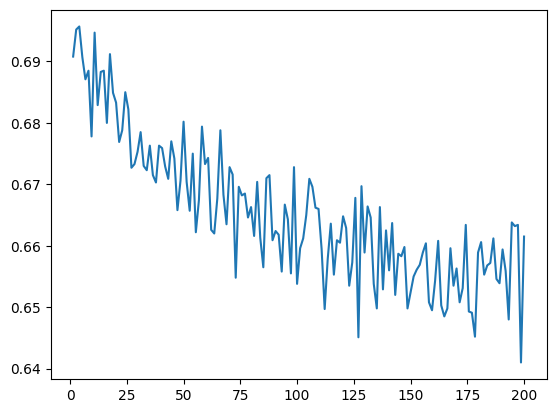

In [13]:
plt.plot(epochs, loss)

### Save Model

In [14]:
great.save("iris_dpllmtgen_test")

C:\0\Github\cs848-group-project\be_great\be_great\great.py:431: UserWarning: Directory iris_dpllmtgen_test already exists and is overwritten now.
  warnings.warn(f"Directory {path} already exists and is overwritten now.")


### Load Model

In [15]:
# great = GReaT.load_from_dir("iris")

### Generate Samples

In [14]:
n_samples = 150

In [15]:
samples = great.sample(n_samples, k=50)

100%|██████████| 150/150 [00:03<00:00, 44.62it/s]


In [16]:
samples.head()

,sepal length,sepal width,petal length,petal width,target
0,5.8,3.2,1.1,1.0,2.0
1,4.6,2.3,2.1,1.5,0.0
2,5.5,3.0,2.2,0.2,2.0
3,5.0,4.2,1.1,1.2,0.0
4,4.6,3.7,2.0,1.2,1.0


In [24]:
samples.to_csv("iris_dpllmtgen_test.csv")

We can also influence the distribution of the column on which the generation is conditioned (In the original dataset all three target values (0, 1, 2) have a probability of 33%).

In [ ]:
samples_custom = great.sample(n_samples, k=50, start_col="target",
                              start_col_dist={"0": 0.5, "1": 0.5, "2": 0})

In [ ]:
samples_custom.head()

## Plot Data

Original Data

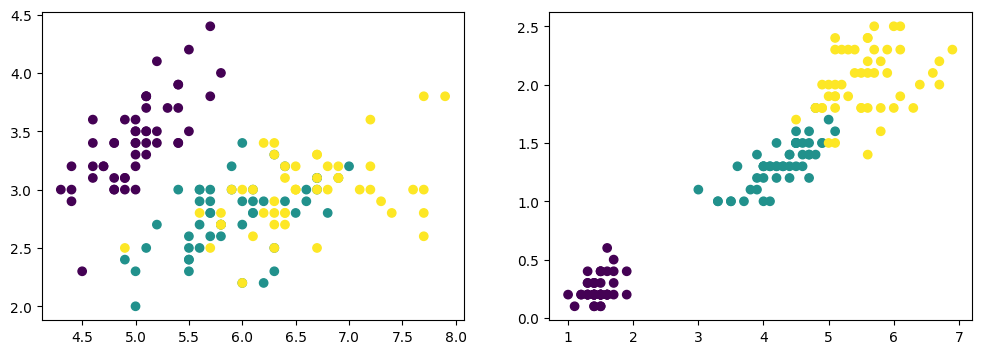

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(data["sepal length"], data["sepal width"], c=data["target"])
ax[1].scatter(data["petal length"], data["petal width"], c=data["target"])

Generated samples

In [13]:
samples = pd.read_csv("iris_dpllmtgen_test.csv")

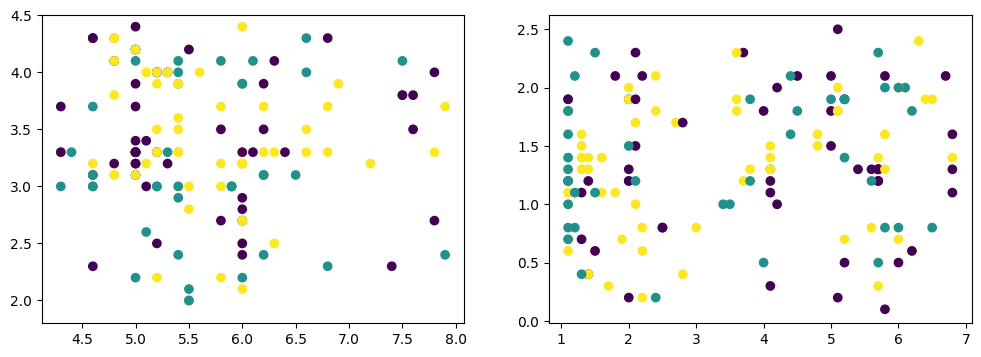

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["sepal length"], samples["sepal width"], c=samples["target"].astype("int"))
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["petal length"], samples["petal width"], c=samples["target"].astype("int"))